In [1]:
import jsonlines
import json
from tqdm import tqdm

In [2]:
inteiro_teor_registers = []
with open('data/10000_examples.json') as json_file:
    data = json.load(json_file)
    inteiro_teor_registers = data['examples']

In [3]:
from syntok.tokenizer import Tokenizer

In [4]:
tok = Tokenizer()

In [15]:
with open('tokens.txt', 'w', encoding='utf-8') as f:
    for inteiro_teor in tqdm(inteiro_teor_registers):
        inteiro_teor_tokens = []
        for token in tok.tokenize(inteiro_teor.lower()):
            f.write(token.value + ' ')
        f.write('\n')

100%|██████████| 10000/10000 [03:00<00:00, 55.40it/s]


In [16]:
import numpy as np

In [79]:
# sentences = []
# for tokenized_inteiro_teor in all_inteiro_teor_tokens:
#     length = int(len(tokenized_inteiro_teor)/100) + 1
#     chunks = np.array_split(tokenized_inteiro_teor, length)
#     for c in chunks:
#         sentences.append(c.tolist())

In [25]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

In [21]:
# model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=4, sg=0)

In [23]:
data = gensim.models.word2vec.LineSentence('tokens.txt')

In [26]:
model = Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [143]:
model.wv.most_similar('parágrafo', topn=15)

[('§', 0.7335083484649658),
 ('paragrafo', 0.709591269493103),
 ('parág', 0.6750540733337402),
 ('§§', 0.624038577079773),
 ('parágrafos', 0.544018030166626),
 ('caput', 0.503514289855957),
 ('(§', 0.49251386523246765),
 ('licc', 0.4901067912578583),
 ('lindb', 0.46870285272598267),
 ('‘§', 0.45249369740486145),
 ('453', 0.4351933002471924),
 ('942', 0.42761826515197754),
 ('§,', 0.42755699157714844),
 ('2028', 0.41920503973960876),
 ('cdc', 0.41797083616256714)]

In [146]:
keys = ['lei', 'acordão', 'conhecido']

In [147]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/home/thiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [148]:
from sklearn.manifold import TSNE

In [149]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


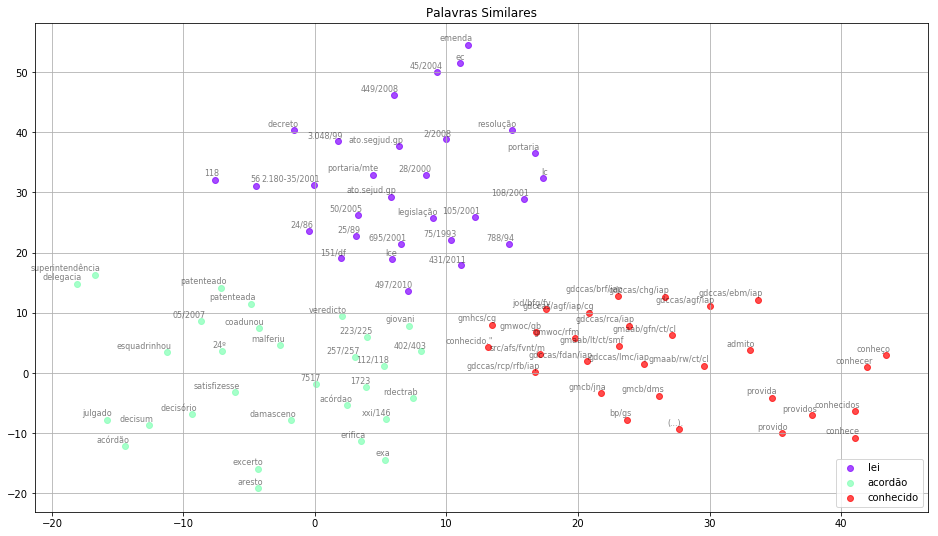

In [150]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Palavras Similares', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

In [151]:
model.wv.most_similar('conhecido', topn=15)

[('conhece', 0.6586626768112183),
 ('conhecidos', 0.6065074801445007),
 ('provida', 0.5458574295043945),
 ('gmwoc/gb', 0.5330535173416138),
 ('gmaab/lt/ct/smf', 0.5296562910079956),
 ('provido', 0.5116744041442871),
 ('conheço', 0.5114588737487793),
 ('gdccas/rcp/rfb/iap', 0.5062399506568909),
 ('gdccas/lmc/iap', 0.5059142112731934),
 ('src/afs/fvnt/m', 0.49727684259414673),
 ('gdccas/rca/iap', 0.49651429057121277),
 ('gmwoc/rfm', 0.4917103946208954),
 ('gdccas/ebm/iap', 0.491533100605011),
 ('gdccas/agf/iap', 0.489390105009079),
 ('gdccas/fdan/iap', 0.478865385055542)]